import some Required library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

import data

In [2]:
data = pd.read_csv("data/survey_results_public.csv")
data_schema= pd.read_csv("data/survey_results_schema.csv")


data.shape  # find out volume of data

(88883, 85)

what we can see when we calling specific data from files  

In [3]:
pd.set_option('display.max_columns', 6)   # number of Colums
pd.set_option('display.max_rows', None)   # number of Rows

                                                Create some functions (most common)

Schedules

In [4]:
def Build_Barh_sizes( key_Phrases , Quantity , Filtered_data ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(Filtered_data)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # Percentage accuracy


    plt.barh(langs, langs_users_num)  
    plt.yticks(range(len(langs)), new_labels)  # Percentage representation and layout of axes



    for spine in ax.spines.values():    # Get rid of vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # Putting and removing values on the X axis
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)    Drawing style 





    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    #plt.rc('xtick', labelsize=16)
    #plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()


Increase-decrease function  (Dictionary)

In [5]:
def sort_Dictionary(Dictionary, reverse = False):        # Sorts by decrease-growth
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

Double list sorter-counter function (lists in list)

In [6]:
def Double_list_sort_count(filtered_list ,Increase_decrease):
  
  global key_Phrases    # We declare it as a global variable         reason: To use in other functions
  global Quantity       # We declare it as a global variable         reason: To use in other functions
  global union

  union = []                          # One big list                 reason: To save every list element (for easy count)

  for i in filtered_list:
      for k in i :                    # this function takes all lists elemets and add them into big list (union) 
          union.append(k)

  Counted = Counter(union)            # Count everysing into big list (union) 

  
  sorted = sort_Dictionary(Counted , Increase_decrease)  # Sorts by decrease-growth    "answer will be Dictinary"


  key_Phrases = []  # It contein Phrases 
  Quantity = []     # It contein Quantity of variable

  

  items = sorted.items()    # Takes items from Dictinary 

  for item in items:      
      key_Phrases.append(item[0])   # Add Phrases into Phrases' list
      Quantity.append(item[1])      # Add Quantity into Quantity' list


The most common function for lists  (not lists in list just one list)

In [7]:
def Dictionary_Distributor(filtered_list , Increase_decrease):

    global key_Phrases      # We declare it as a global variable         reason: To use in other functions
    global Quantity         # We declare it as a global variable         reason: To use in other functions

    Counted = Counter(filtered_list)   # Count everysing into filtered_list

    sorted = sort_Dictionary (Counted , Increase_decrease)  # Sorts by decrease-growth    "answer will be Dictinary"

    key_Phrases = []    # It contein Phrases 
    Quantity = []       # It contein Quantity of variable

    for i in sorted:
        key_Phrases.append(i)           # Add Phrases into Phrases' list
        Quantity.append(sorted[i])      # Add Quantity into Quantity' list

                                                    Let's start "Data Analysis"

                                                            Community

                                                            Site Use

Visiting Stack Overflow

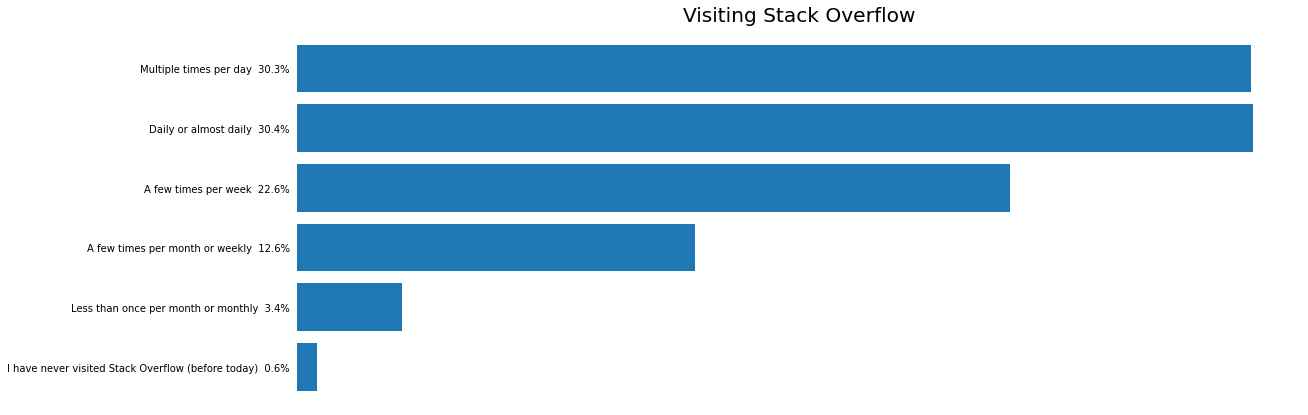

In [8]:
SOVisitFreq = data ["SOVisitFreq"]
SOVisitFreq.dropna(inplace=True)

SOVisitFreq_Counted = Counter(SOVisitFreq)

key_Phrases =  ['I have never visited Stack Overflow (before today)' , 'Less than once per month or monthly', 'A few times per month or weekly', "A few times per week", "Daily or almost daily", "Multiple times per day"]
Quantity = []

for i in key_Phrases:
    Quantity.append(SOVisitFreq_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOVisitFreq ,"fivethirtyeight", False , (18,7), "Visiting Stack Overflow")   # Building a schedule

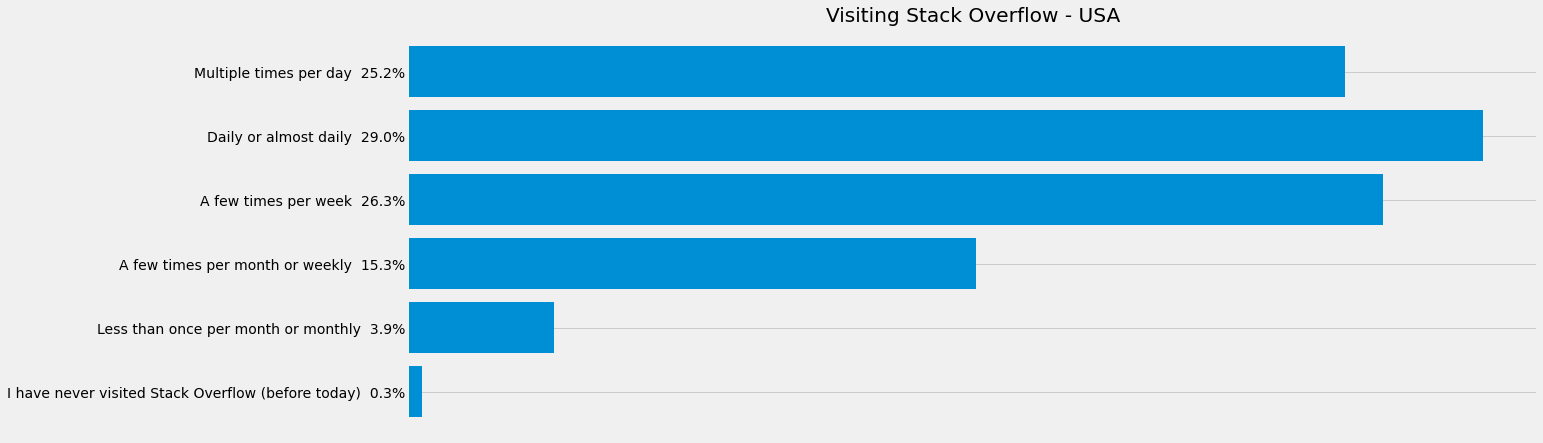

In [9]:
SOVisitFreq = data ["SOVisitFreq"]
SOVisitFreq.dropna(inplace=True)

new_SOVisitFreq = data[ (SOVisitFreq != 'nan') & (data["Country"] == "United States")]
SOVisitFreq = new_SOVisitFreq["SOVisitFreq"]

SOVisitFreq_Counted = Counter(SOVisitFreq)

key_Phrases =  ['I have never visited Stack Overflow (before today)' , 'Less than once per month or monthly', 'A few times per month or weekly', "A few times per week", "Daily or almost daily", "Multiple times per day"]
Quantity = []

for i in key_Phrases:
    Quantity.append(SOVisitFreq_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOVisitFreq ,"fivethirtyeight", False , (18,7), "Visiting Stack Overflow - USA")   # Building a schedule

When Did You First Visit Stack Overflow?


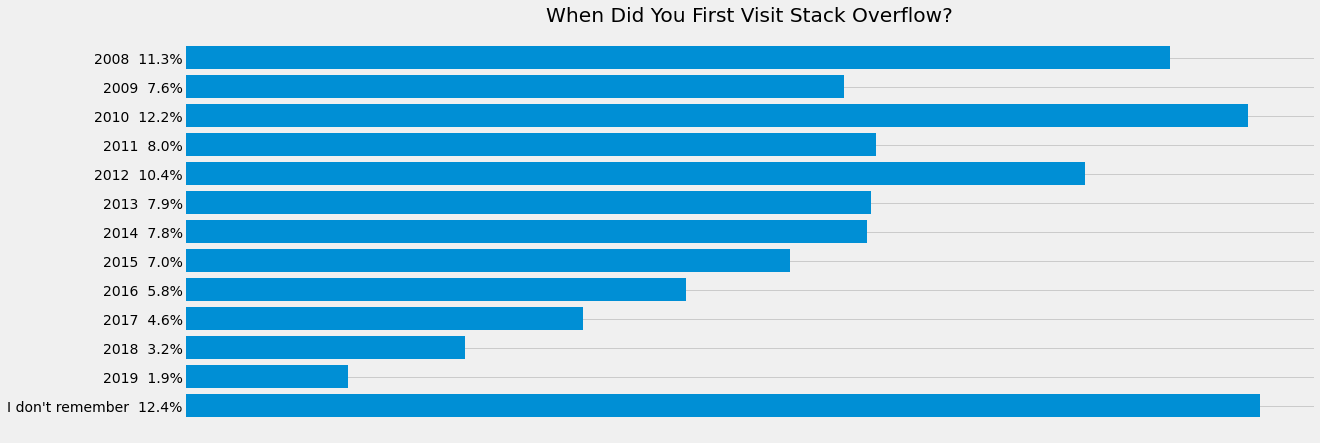

In [10]:
SOVisit1st = data['SOVisit1st']
SOVisit1st.dropna(inplace=True)

SOVisit1st_Counted = Counter(SOVisit1st)


key_Phrases =  ["I don't remember"]
Quantity = []


for i in range(2019,2007,-1):
    key_Phrases.append(str(i))



for i in key_Phrases:
    Quantity.append(SOVisit1st_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOVisit1st ,"fivethirtyeight", False , (18,7), "When Did You First Visit Stack Overflow?")   # Building a schedule

How Many Participants Have a Stack Overflow Account?

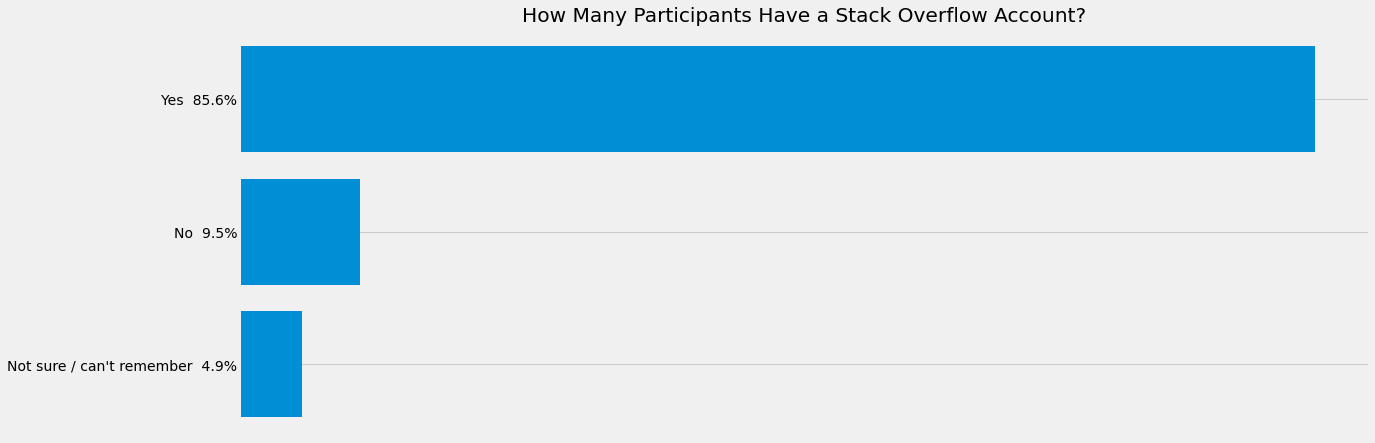

In [11]:
SOAccount = data['SOAccount']
SOAccount.dropna(inplace=True)

Dictionary_Distributor(SOAccount, False)

Build_Barh_sizes( key_Phrases , Quantity, SOAccount ,"fivethirtyeight", False , (18,7), "How Many Participants Have a Stack Overflow Account?")   # Building a schedule

Why Do Developers Visit Stack Overflow?

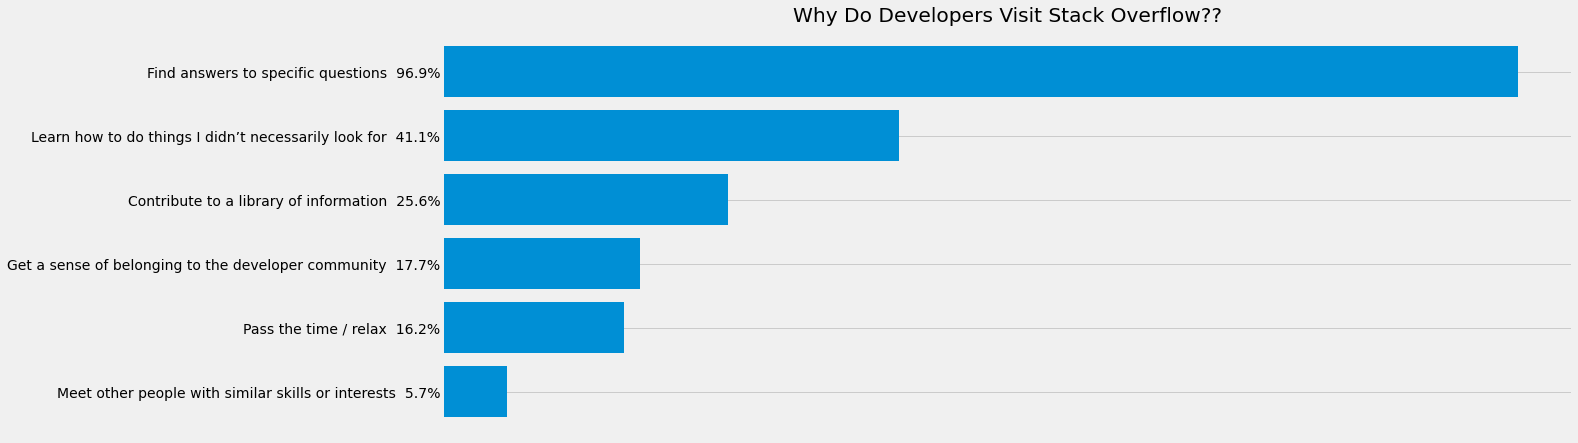

In [12]:
SOVisitTo = data['SOVisitTo']
SOVisitTo.dropna(inplace=True)
SOVisitTo = SOVisitTo.str.split(";")

Double_list_sort_count(SOVisitTo, False)

Build_Barh_sizes( key_Phrases , Quantity, SOVisitTo ,"fivethirtyeight", False , (18,7), "Why Do Developers Visit Stack Overflow??")   # Building a schedule

Finding Answers on Stack Overflow

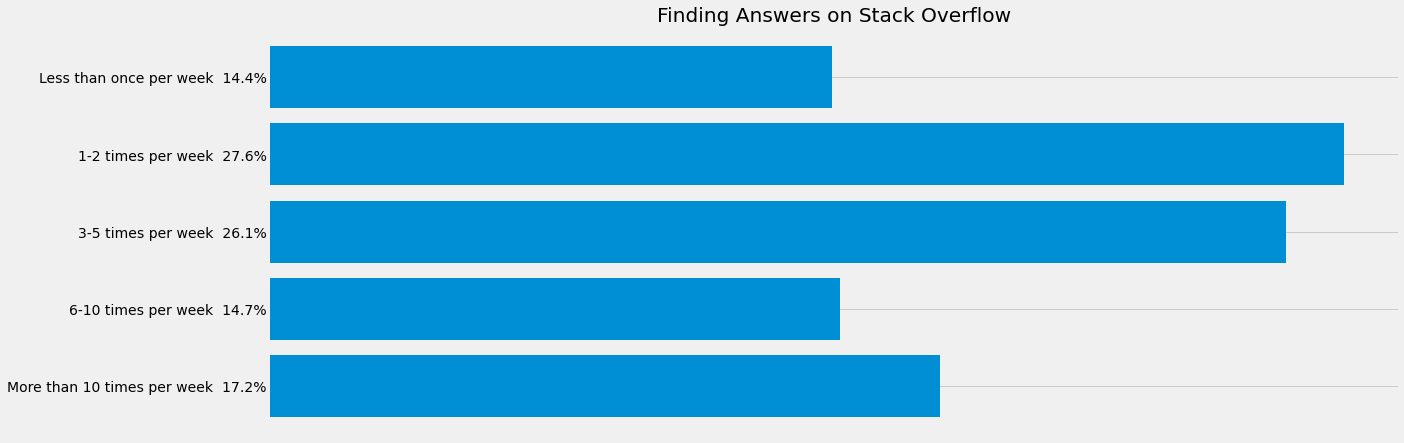

In [13]:
SOFindAnswer = data['SOFindAnswer']
SOFindAnswer.dropna(inplace=True)


SOFindAnswer_Counted = Counter(SOFindAnswer)

key_Phrases =  ['Less than once per week','1-2 times per week', '3-5 times per week','6-10 times per week',  'More than 10 times per week' ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOFindAnswer_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOFindAnswer ,"fivethirtyeight", False , (18,7), "Finding Answers on Stack Overflow")   # Building a schedule

Comparing Stack Overflow to Other Resources

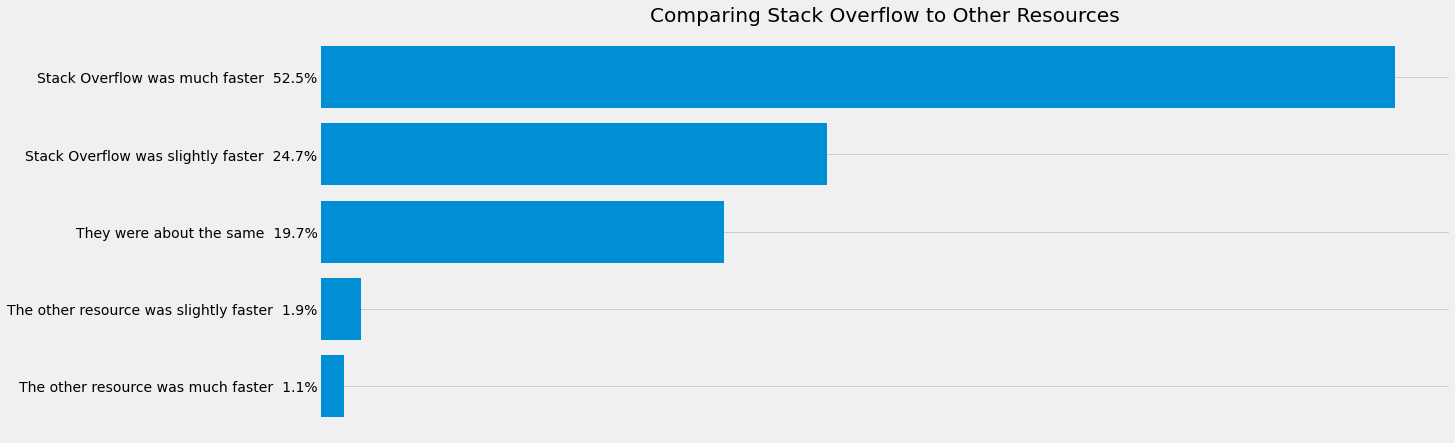

In [14]:
SOTimeSaved = data["SOTimeSaved"]
SOTimeSaved.dropna(inplace=True)

Dictionary_Distributor(SOTimeSaved , False)

Build_Barh_sizes( key_Phrases , Quantity, SOTimeSaved ,"fivethirtyeight", False , (18,7), "Comparing Stack Overflow to Other Resources")   # Building a schedule

How Much Time Does Stack Overflow Save Developers?

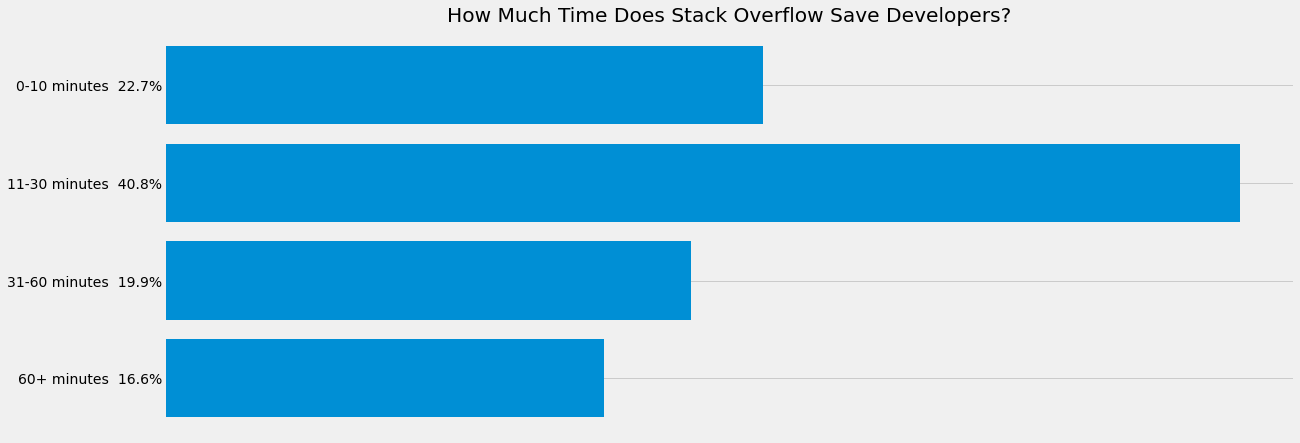

In [15]:
SOHowMuchTime = data["SOHowMuchTime"]
SOHowMuchTime.dropna(inplace=True)

SOHowMuchTime_Counted = Counter(SOHowMuchTime)

key_Phrases =  ['0-10 minutes','11-30 minutes', '31-60 minutes','60+ minutes' ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOHowMuchTime_Counted[i])

Build_Barh_sizes( key_Phrases , Quantity, SOHowMuchTime ,"fivethirtyeight", False , (18,7), "How Much Time Does Stack Overflow Save Developers?")   # Building a schedule

                                                                Engaging Together

How Often Do Developers Participate on Stack Overflow?

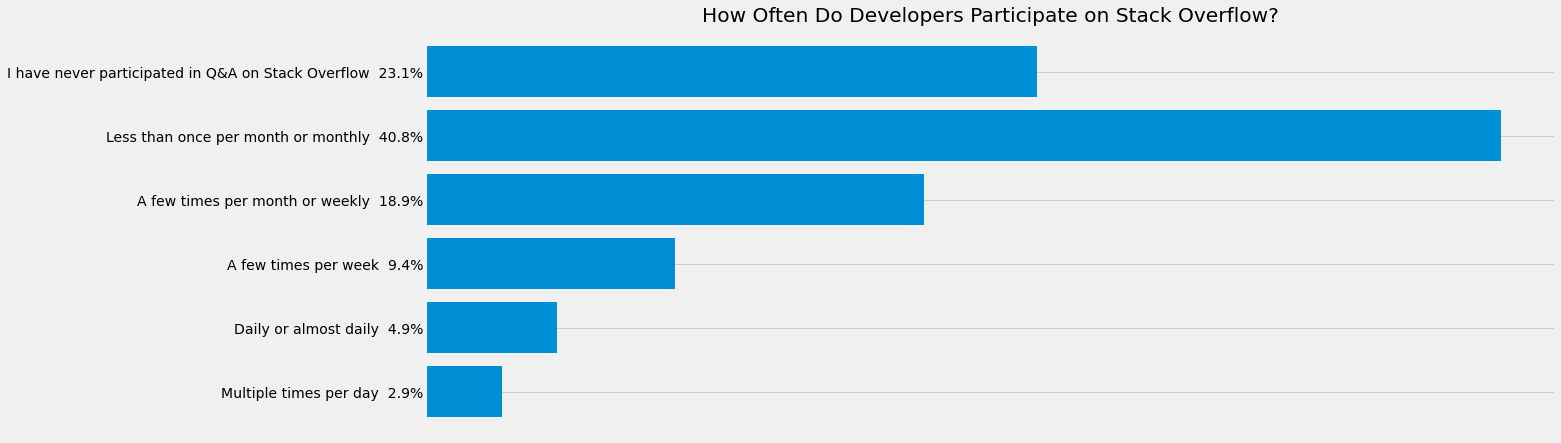

In [16]:
SOPartFreq = data["SOPartFreq"]
SOPartFreq.dropna(inplace=True)

SOPartFreq_Counted = Counter(SOPartFreq)

key_Phrases =  ['I have never participated in Q&A on Stack Overflow','Less than once per month or monthly', 'A few times per month or weekly','A few times per week', "Daily or almost daily", "Multiple times per day" ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOPartFreq_Counted[i])

Build_Barh_sizes( key_Phrases , Quantity, SOPartFreq ,"fivethirtyeight", False , (18,7), "How Often Do Developers Participate on Stack Overflow?")   # Building a schedule

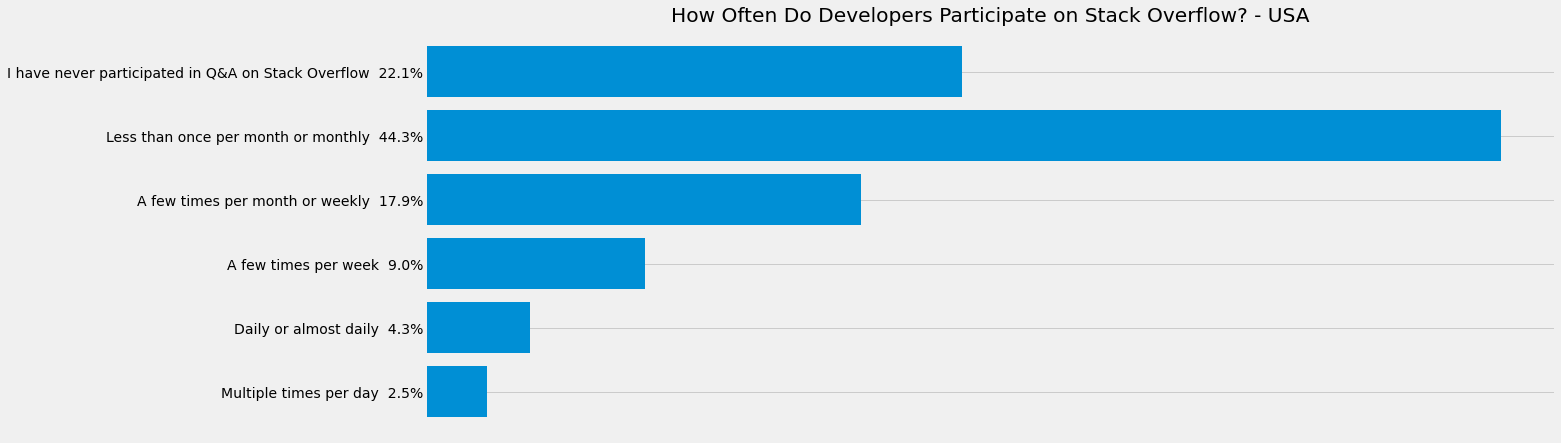

In [17]:
SOPartFreq = data ["SOPartFreq"]
SOPartFreq.dropna(inplace=True)

new_SOPartFreq = data[ (SOPartFreq != 'nan') & (data["Country"] == "United States")]
SOPartFreq = new_SOPartFreq["SOPartFreq"]

SOPartFreq_Counted = Counter(SOPartFreq)

key_Phrases =  ['I have never participated in Q&A on Stack Overflow','Less than once per month or monthly', 'A few times per month or weekly','A few times per week', "Daily or almost daily", "Multiple times per day" ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOPartFreq_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOPartFreq ,"fivethirtyeight", False , (18,7), "How Often Do Developers Participate on Stack Overflow? - USA")   # Building a schedule

Do Developers Consider Themselves Part of the Stack Overflow Community?

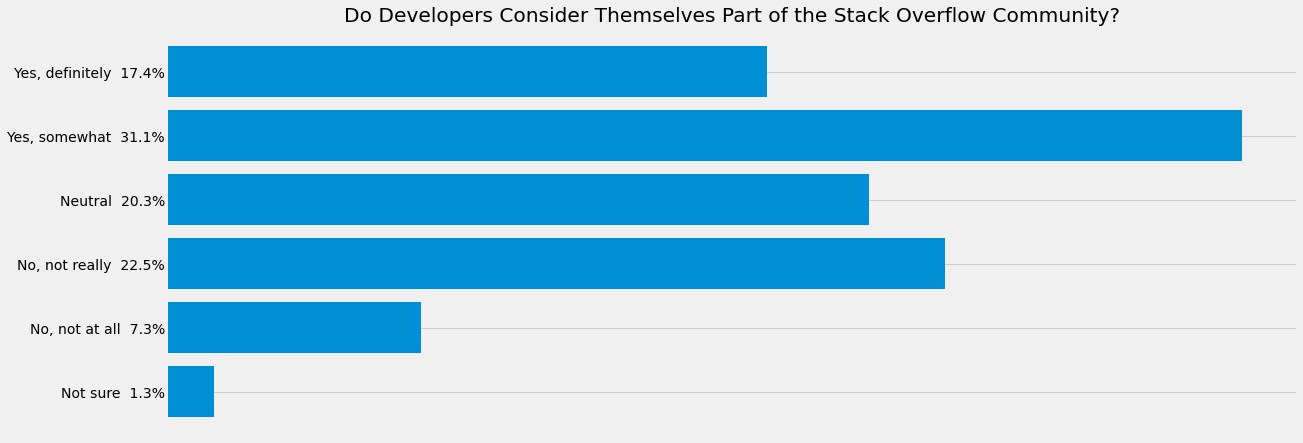

In [18]:
SOComm = data["SOComm"]
SOComm.dropna(inplace=True)

SOComm_Counted = Counter(SOComm)

key_Phrases =  ['Yes, definitely','Yes, somewhat','Neutral','No, not really', 'No, not at all' , 'Not sure'   ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOComm_Counted[i])

Build_Barh_sizes( key_Phrases , Quantity, SOComm ,"fivethirtyeight", False , (18,7), 'Do Developers Consider Themselves Part of the Stack Overflow Community?')   # Building a schedule

Is Stack Overflow More Welcoming Than Last Year?

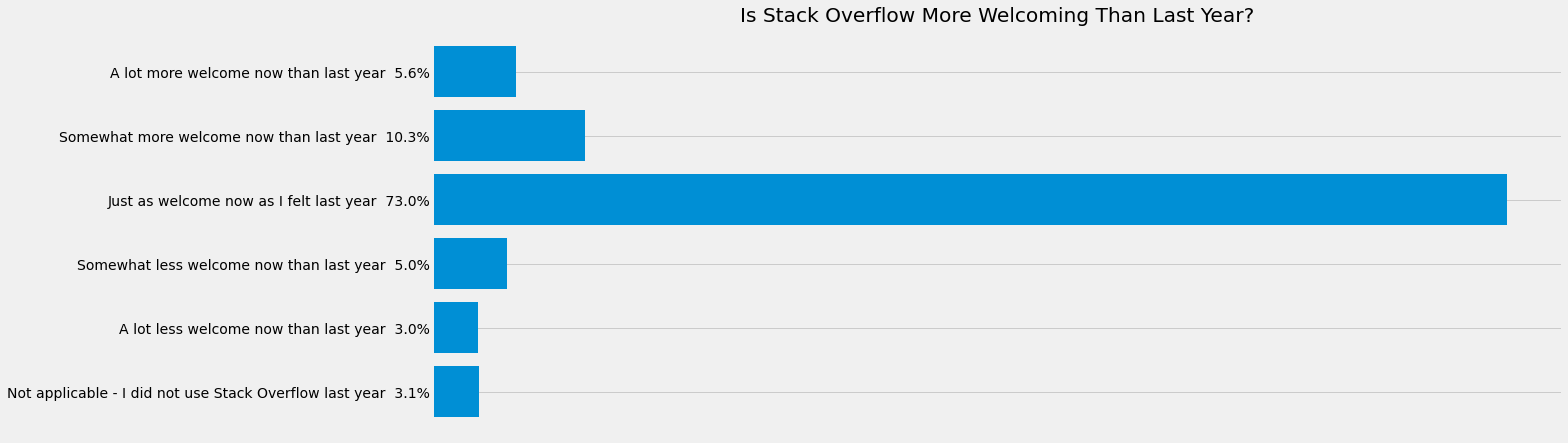

In [19]:
WelcomeChange = data["WelcomeChange"]
WelcomeChange.dropna(inplace=True)

WelcomeChange_Counted = Counter(WelcomeChange)

key_Phrases =  ['A lot more welcome now than last year','Somewhat more welcome now than last year','Just as welcome now as I felt last year','Somewhat less welcome now than last year', 'A lot less welcome now than last year' , 'Not applicable - I did not use Stack Overflow last year'   ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(WelcomeChange_Counted[i])

Build_Barh_sizes( key_Phrases , Quantity, WelcomeChange ,"fivethirtyeight", False , (18,7), 'Is Stack Overflow More Welcoming Than Last Year?')   # Building a schedule

Opinions on New Content Types

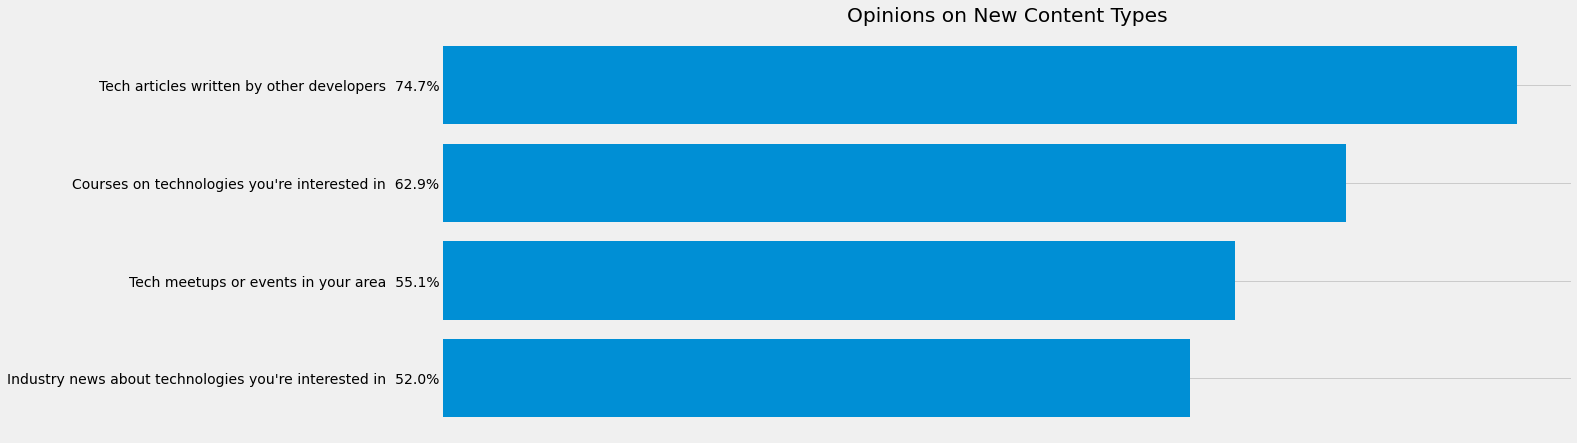

In [20]:
SONewContent = data["SONewContent"]
SONewContent.dropna(inplace=True)

SONewContent = SONewContent.str.split(";")

Double_list_sort_count(SONewContent, False)

Build_Barh_sizes( key_Phrases , Quantity, SONewContent ,"fivethirtyeight", False , (18,7), 'Opinions on New Content Types')   # Building a schedule
